In [1]:
import pandas as pd   
df = pd.read_csv("C:/Users/82102/OneDrive/바탕 화면/df/변수선택.csv", encoding = 'cp949')
df

,day,W_s,Dew,Press,See_1,일산화탄소농도,미세먼지농도,초미세먼지농도
0,2022-01-01,0.916291,-15.078261,1020.221739,1,0.624,27.80,0
1,2022-01-02,1.225000,-8.450000,1015.654167,1,0.612,35.32,0
2,2022-01-03,1.063273,-10.100000,1015.504167,1,0.660,25.90,0
3,2022-01-04,1.215160,-10.566667,1016.833333,1,0.594,35.00,0
4,2022-01-05,1.002468,-13.104167,1017.091667,1,0.812,48.26,0
...,...,...,...,...,...,...,...,...
360,2022-12-27,1.017643,-7.687500,1018.008333,1,0.872,49.08,1
361,2022-12-28,1.240787,-10.191667,1019.058333,1,0.564,34.92,0
362,2022-12-29,1.002468,-11.454167,1021.512500,1,0.576,30.10,0
363,2022-12-30,1.073294,-7.362500,1020.816667,1,0.606,38.20,0


In [3]:
#train, test 분리
from sklearn.model_selection import train_test_split
feature = df.iloc[:,1:7]
target = df['초미세먼지농도']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, stratify=target, random_state=100)

#oversampling
from imblearn.over_sampling import RandomOverSampler
X_train2, y_train2 = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
X_test2, y_test2 = RandomOverSampler(random_state=0).fit_resample(X_test, y_test)

In [4]:
# 종속변수가 이진 모델 (binomial) -> 로지스틱 모델 사용 
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 (L1 정규화 적용)
# max_iter 매개변수 설정하지 않으면 수렴 실패 -> max_iter 매개변수 늘리기 
logit_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=100, max_iter=1000)

# 모델 학습
logit_model.fit(X_train2, y_train2)

# 모델 예측
y_pred = logit_model.predict(X_test2)

In [5]:
# 모델 성능 평가
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

auc = roc_auc_score(y_test2, y_pred)
accuracy = accuracy_score(y_test2, y_pred)
recall = recall_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)

print("AUC:", auc)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 스코어:", f1)

AUC: 0.9595959595959597
Accuracy: 0.9595959595959596
Recall: 1.0
Precision: 0.9252336448598131
F1 스코어: 0.9611650485436893


In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test2, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[91  8]
 [ 0 99]]


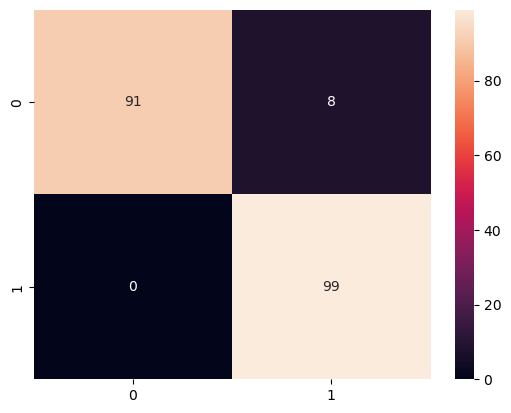

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()